# Auencorder

## Create the training data

In [6]:
import numpy as np

# Load the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

## Setting the parameters of the autoencoder

In [7]:
epochs = 20
batch_size = 128
n_in_out = x_train.shape[1]
n_hidden = 64

## Create the autoencoder

In [8]:
from keras.models import Model
from keras.layers import Input, Dense

# build the network of the autoencoder
x = Input(shape=(n_in_out,))
encoder = Dense(n_hidden, activation='relu')(x)
decoder = Dense(n_in_out, activation='sigmoid')
y = decoder(encoder)

# build the model of the autoencoder
autoencoder = Model(x, y)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# build the model of the encoder
encoder = Model(x, encoder)

# build the model of the decoder
decoder_input = Input(shape=(n_hidden,))
decoder = Model(decoder_input, decoder(decoder_input))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 12s 17ms/step - loss: 0.1992 - val_loss: 0.1338
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1178 - val_loss: 0.1032
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0968 - val_loss: 0.0893
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0862 - val_loss: 0.0819
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0808 - val_loss: 0.0783
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0781 - val_loss: 0.0764
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0766 - val_loss: 0.0753
Epoch 8/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0757 - val_loss: 0.0746
Epoch 9/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0751 - val_loss: 0.0741
Epoch 10/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0746 - val_

## Create the image 

313/313 [==============================] - 2s 7ms/step


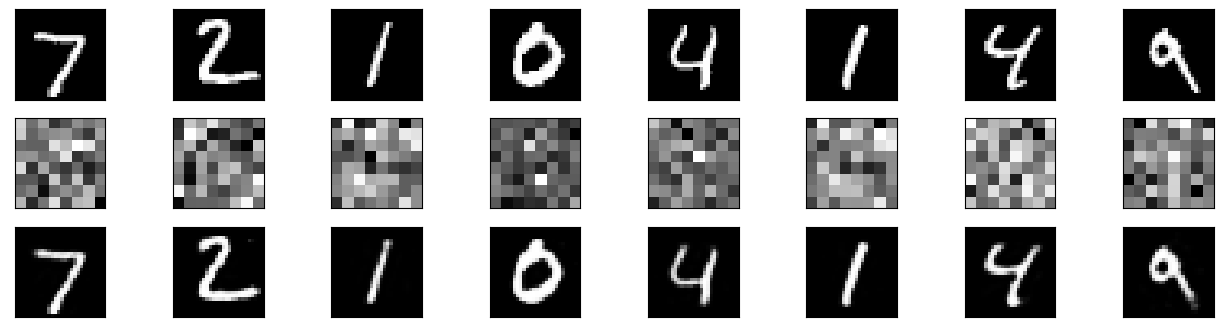

In [10]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)

import matplotlib.pyplot as plt
n=8
plt.figure(figsize=(16, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(encoded[i].reshape(8, 8), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(decoded[i].reshape(28, 28), cmap='Greys_r')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()